# **Visualização dos dados do SINAN (2007-2023) - Abelha**

# **Inicializando os dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
!pip install -q gdown
import gdown

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ'
output = 'dados.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ
To: /content/dados.csv
100%|██████████| 73.6M/73.6M [00:00<00:00, 153MB/s]


'dados.csv'

In [4]:
df = pd.read_csv('dados.csv', sep=',', encoding='latin1')
df.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
0,2007-01-25,200704,2007,35,350280,1958.0,4048,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2007-01-29,200705,2007,35,354850,1960.0,4046,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN
2,2007-01-22,200704,2007,35,351660,NaN,4018,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2007-01-25,200704,2007,35,351660,1967.0,4039,F,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,2007-01-03,200701,2007,35,351660,1988.0,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [5]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN', 'ANI_ARANHA',
       'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS', 'NU_AMPOL_1',
       'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7', 'NU_AMPO_5',
       'NU_AMPOL_9', 'NU_AMPOL_3', 'DOENCA_TRA', 'EVOLUCAO'],
      dtype='object')

In [6]:
df = df[df['TP_ACIDENT'] == 5]

# **Gerando visualizações gerais**

## Número de casos ao longo do tempo

### Número de acidentes por ano

In [7]:
ano_abs = pd.crosstab(index=df['NU_ANO'], columns='Frequência').reset_index()
ano_abs

col_0,NU_ANO,Frequência
0,2007,1389
1,2008,1579
2,2009,1846
3,2010,1831
4,2011,2074
5,2012,2327
6,2013,2472
7,2014,2616
8,2015,2665
9,2016,2567


In [8]:
fig = px.line(ano_abs, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Acidentes'},
              title='Número de Acidentes por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs['Frequência'])

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(xaxis=dict(dtick=1), yaxis_title="Número de Acidentes", xaxis_title="Ano")

# Exibir o gráfico
fig.show()

In [9]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')
df_obitos = df[df['EVOLUCAO'] == 2]

ano_abs_obitos = pd.crosstab(index=df_obitos['NU_ANO'], columns='Frequência').reset_index()
ano_abs_obitos

col_0,NU_ANO,Frequência
0,2007,1
1,2008,1
2,2009,5
3,2010,4
4,2011,3
5,2012,5
6,2013,6
7,2014,5
8,2015,3
9,2016,4


In [10]:
fig = px.line(ano_abs_obitos, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Óbitos'},
              title='Número de Óbitos por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs_obitos['Frequência'],

    )

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs_obitos['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(xaxis=dict(dtick=1), yaxis_title="Número de Óbitos", xaxis_title="Ano")

# Exibir o gráfico
fig.show()

In [11]:
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']
ano_abs_obitos['Label'] = ano_abs_obitos['Percentual'].map(lambda x: f'{x :.3f}%')

ano_abs_obitos

col_0,NU_ANO,Frequência,Percentual,Label
0,2007,1,0.071994,0.072%
1,2008,1,0.063331,0.063%
2,2009,5,0.270856,0.271%
3,2010,4,0.218460,0.218%
4,2011,3,0.144648,0.145%
5,2012,5,0.214869,0.215%
6,2013,6,0.242718,0.243%
7,2014,5,0.191131,0.191%
8,2015,3,0.112570,0.113%
9,2016,4,0.155824,0.156%


In [12]:
# Calcular proporção de óbitos em relação aos acidentes
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']

# Criar a figura
fig = go.Figure()

# Acidentes em barras
fig.add_trace(go.Bar(
    x=ano_abs['NU_ANO'],
    y=ano_abs['Frequência'],
    name='Acidentes',
    marker_color=px.colors.qualitative.Safe[0],
    text=ano_abs['Frequência'],
    textposition='outside',
    yaxis='y'
))

# Óbitos em proporção (linha)
fig.add_trace(go.Scatter(
    x=ano_abs_obitos['NU_ANO'],
    y=ano_abs_obitos['Percentual'],
    name='Óbitos ',
    mode='lines+markers+text',
    text=ano_abs_obitos['Label'],
    textposition='top center',
    line=dict(color=px.colors.qualitative.Safe[1], width=3),
    marker=dict(size=8),
    yaxis='y2'
))

# Layout com eixo y2 ajustado para proporção (0 a 1)
fig.update_layout(
    title='Acidentes com Animais Peçonhentos e Percentual de Óbitos em SP (2007–2023)',
    xaxis=dict(title='Ano', dtick=1, showgrid=True),  # grade ativada
    yaxis=dict(title='Número de Acidentes', showgrid=True),  # grade ativada
    yaxis2=dict(
        title='Óbitos Relativo ao Acidentes (%)',
        overlaying='y',
        side='right',
        showgrid=True,  # grade ativada
        range=[0, 1]
    ),
    legend=dict(
        title='Indicador',
        orientation='v',
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
    barmode='group',
    template='plotly_white'
)


fig.show()


### Número de acidentes por semana epidemiológica


In [13]:
# Removendo espaços em branco, preenchendo valores vazios com '00' e mantendo os dois últimos dígitos
df['SEM_NOT'] = (
    df['SEM_NOT']
    .astype(str)
    .str.strip()               # Remove espaços em branco
    .replace('', '00')          # Substitui valores vazios por '00'
    .str[-2:]                   # Mantém apenas os dois últimos dígitos
    .astype(int)                # Converte de volta para inteiro
)

display(df)

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
0,2007-01-25,4,2007,35,350280,1958.0,4048,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2007-01-22,4,2007,35,351660,NaN,4018,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,2007-01-03,1,2007,35,351660,1988.0,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
25,2007-01-19,3,2007,35,352260,1983.0,4023,F,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
36,2007-01-18,3,2007,35,352690,1996.0,4010,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538051,2023-12-31,1,2023,35,352520,NaN,4003,M,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538061,2023-12-31,1,2023,35,355450,1987.0,4036,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538064,2023-12-31,1,2023,35,353790,2010.0,4013,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538081,2023-12-31,1,2023,35,350870,2000.0,4023,F,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1


In [14]:
# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "SEM_NOT"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e semana
fig = px.bar(
    filtered_data,
    x="SEM_NOT",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Semana de Notificação",
    labels={"SEM_NOT": "Semana de Notificação", "Casos": "Número de Casos", "NU_ANO":"Ano" },
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

### Número de acidentes por mês

In [15]:
# Extraindo o mês de 'DT_NOT' nas posições 5 e 6
df['MES'] = df['DT_NOTIFIC'].astype(str).str[5:7]

# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "MES"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e mês
fig = px.bar(
    filtered_data,
    x="MES",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Mês de Notificação",
    labels={"MES": "Mês", "Casos": "Número de Casos", "NU_ANO": "Ano"},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()


## Informações dos acidentes


### Aplicação de soro

In [16]:
soro = pd.crosstab(index=df['CON_SOROTE'], columns='Frequência').reset_index()
soro

col_0,CON_SOROTE,Frequência
0,1.0,271
1,2.0,43956
2,9.0,3827


In [17]:
soro_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

soro['Soro'] = soro['CON_SOROTE'].map(soro_legend)

# Gráfico de pizza
fig = px.pie(
    soro,
    names='Soro',
    values='Frequência',
    title='Aplicação de soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()


In [18]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
soro_obt = pd.crosstab(index=df_obt['CON_SOROTE'], columns='Frequência').reset_index()
soro_obt

col_0,CON_SOROTE,Frequência
0,1.0,4
1,2.0,78
2,9.0,9


In [19]:
soro_obt['Percentual'] = (soro_obt['Frequência'] / soro['Frequência']) * 100
soro_obt['Label'] = soro_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
soro_obt['Soro'] = soro_obt['CON_SOROTE'].map(soro_legend)
soro_obt

col_0,CON_SOROTE,Frequência,Percentual,Label,Soro
0,1.0,4,1.476015,1.476%,Sim
1,2.0,78,0.177450,0.177%,Não
2,9.0,9,0.235171,0.235%,Ignorado


In [20]:
# Gráfico de pizza
fig = px.pie(
    soro_obt,
    names='Soro',
    values='Frequência',
    title='Percentual de mortes e soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

### Tempo de atendimento

In [21]:
tempo = pd.crosstab(index=df['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo

col_0,ANT_TEMPO_,Frequência
0,1.0,21449
1,2.0,7639
2,3.0,2538
3,4.0,1275
4,5.0,3689
5,6.0,5668
6,9.0,4842


In [22]:
tempo_dict = {
    1: '0 - 1h',
    2: '1 - 3h',
    3: '3 - 6h',
    4: '6 - 12h',
    5: '12 - 24h',
    6: '24h ou mais',
    9: 'Ignorado'
}

tempo['Tempo'] = tempo['ANT_TEMPO_'].map(tempo_dict)
tempo

col_0,ANT_TEMPO_,Frequência,Tempo
0,1.0,21449,0 - 1h
1,2.0,7639,1 - 3h
2,3.0,2538,3 - 6h
3,4.0,1275,6 - 12h
4,5.0,3689,12 - 24h
5,6.0,5668,24h ou mais
6,9.0,4842,Ignorado


In [23]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Frequência',
    title='Número de casos por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

In [24]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
tempo_obt = pd.crosstab(index=df_obt['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo['Óbitos'] = tempo_obt['Frequência']
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos
0,1.0,21449,0 - 1h,53
1,2.0,7639,1 - 3h,12
2,3.0,2538,3 - 6h,4
3,4.0,1275,6 - 12h,2
4,5.0,3689,12 - 24h,4
5,6.0,5668,24h ou mais,2
6,9.0,4842,Ignorado,13


In [25]:
tempo['Percentual'] = tempo['Óbitos'] * 100 / tempo['Frequência']
tempo['Label'] = tempo['Percentual'].apply(lambda x: f'{x:.3f}%')
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos,Percentual,Label
0,1.0,21449,0 - 1h,53,0.247098,0.247%
1,2.0,7639,1 - 3h,12,0.157089,0.157%
2,3.0,2538,3 - 6h,4,0.157604,0.158%
3,4.0,1275,6 - 12h,2,0.156863,0.157%
4,5.0,3689,12 - 24h,4,0.108430,0.108%
5,6.0,5668,24h ou mais,2,0.035286,0.035%
6,9.0,4842,Ignorado,13,0.268484,0.268%


In [26]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Óbitos',
    title='Número de mortes por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

In [27]:
fig = px.bar(
    tempo,
    x='Tempo',
    y='Percentual',
    title='Taxa de letalidade por tempo de espera',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.show()

### Aplicação de soro e Tempo de espera

In [28]:
# Filtrar valores onde ANT_TEMPO_ ≠ 9
#df_filtrado = df[df['ANT_TEMPO_'] != 9]
#df_filtrado = df_filtrado[df_filtrado['CON_SOROTE'] != 9]

# Gerar a crosstab com os valores válidos
#soro_tempo = pd.crosstab(df_filtrado['ANT_TEMPO_'], df_filtrado['CON_SOROTE'])
soro_tempo = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'])
soro_tempo

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,164,19970,1315
2.0,39,7135,465
3.0,12,2318,208
4.0,5,1170,100
5.0,8,3343,338
6.0,17,5193,458
9.0,14,4227,601


In [29]:
# Renomear o índice (linhas) com tempo_dict
soro_tempo.index = soro_tempo.index.map(tempo_dict)

# Renomear as colunas com soro_dict
soro_tempo.columns = [soro_legend.get(col, col) for col in soro_tempo.columns]
soro_tempo

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,164,19970,1315
1 - 3h,39,7135,465
3 - 6h,12,2318,208
6 - 12h,5,1170,100
12 - 24h,8,3343,338
24h ou mais,17,5193,458
Ignorado,14,4227,601


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

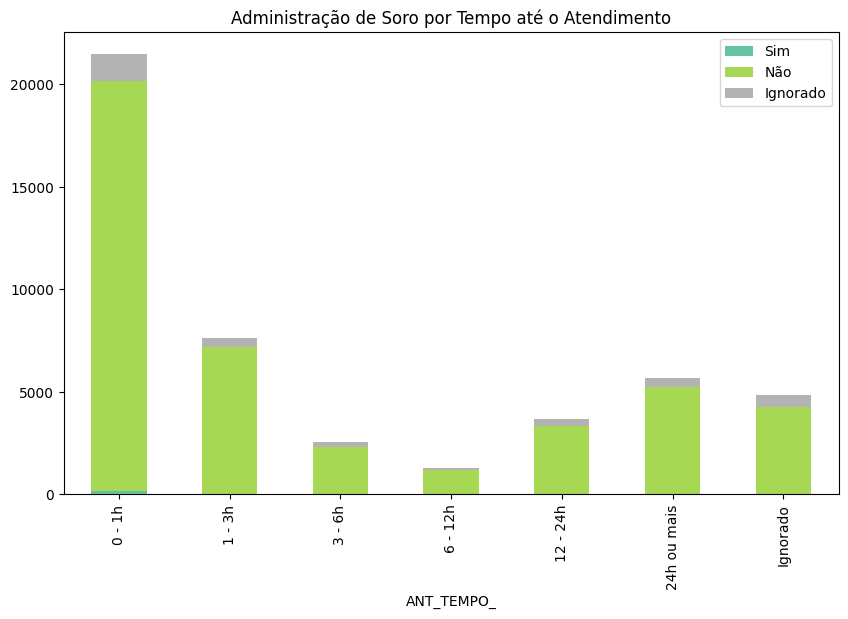

In [30]:
soro_tempo.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

In [31]:
percentual = soro_tempo.div(soro_tempo.sum(axis=1), axis=0) * 100

percentual_plot = percentual.reset_index().melt(id_vars='ANT_TEMPO_', var_name='Recebeu Soro', value_name='Percentual')

fig = px.bar(
    percentual_plot,
    x='ANT_TEMPO_',
    y='Percentual',
    color='Recebeu Soro',
    title='Percentual de Administração de Soro por Tempo até o Atendimento',
    text=percentual_plot['Percentual'].round(1).astype(str) + '%',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_traces(textposition='inside')
fig.show()


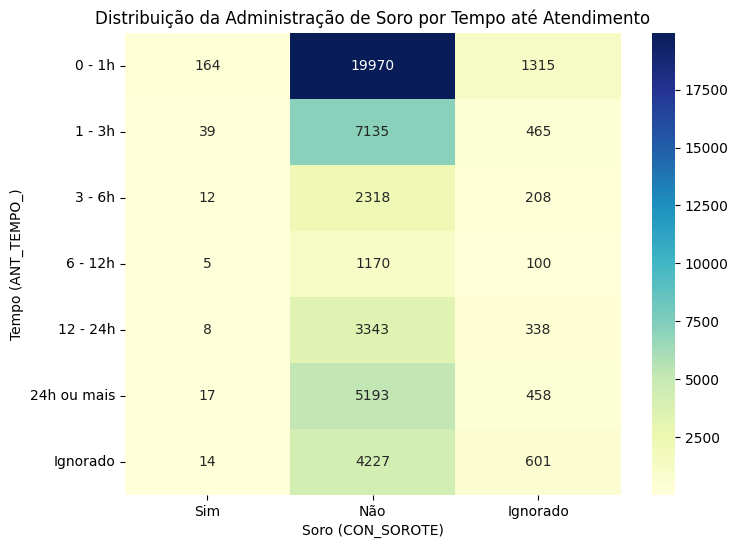

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo (ANT_TEMPO_)")
plt.xlabel("Soro (CON_SOROTE)")
plt.show()


In [33]:
soro_tempo_N = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='index')
soro_tempo_N

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.007646,0.931046,0.061308
2.0,0.005105,0.934023,0.060872
3.0,0.004728,0.913318,0.081954
4.0,0.003922,0.917647,0.078431
5.0,0.002169,0.906208,0.091624
6.0,0.002999,0.916196,0.080805
9.0,0.002891,0.872986,0.124122


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

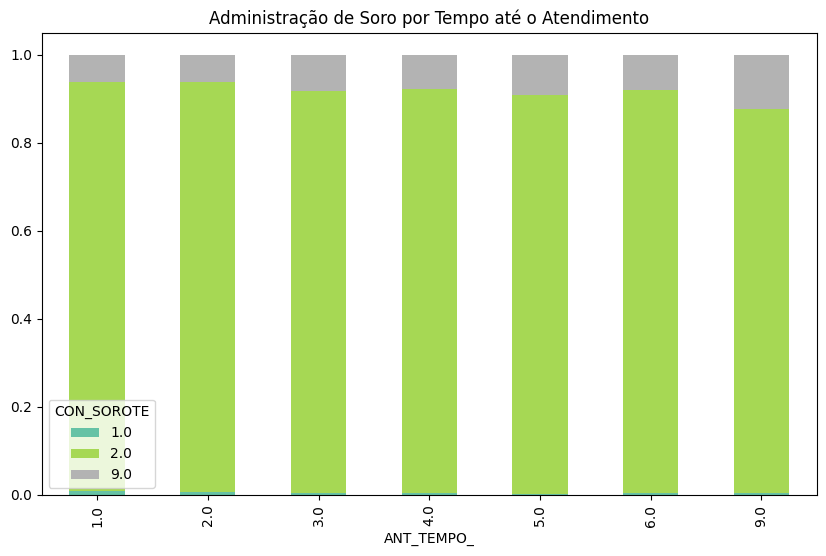

In [34]:
soro_tempo_N.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

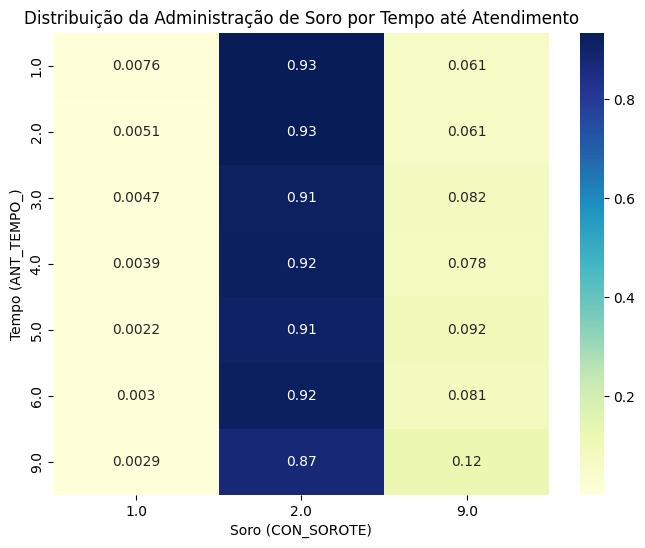

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo_N, annot=True, cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo (ANT_TEMPO_)")
plt.xlabel("Soro (CON_SOROTE)")
plt.show()


In [36]:
soro_tempo_N2 = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='columns')
soro_tempo_N2

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.633205,0.460605,0.377331
2.0,0.150579,0.164568,0.133429
3.0,0.046332,0.053464,0.059684
4.0,0.019305,0.026986,0.028694
5.0,0.030888,0.077106,0.096987
6.0,0.065637,0.119776,0.131420
9.0,0.054054,0.097495,0.172453


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

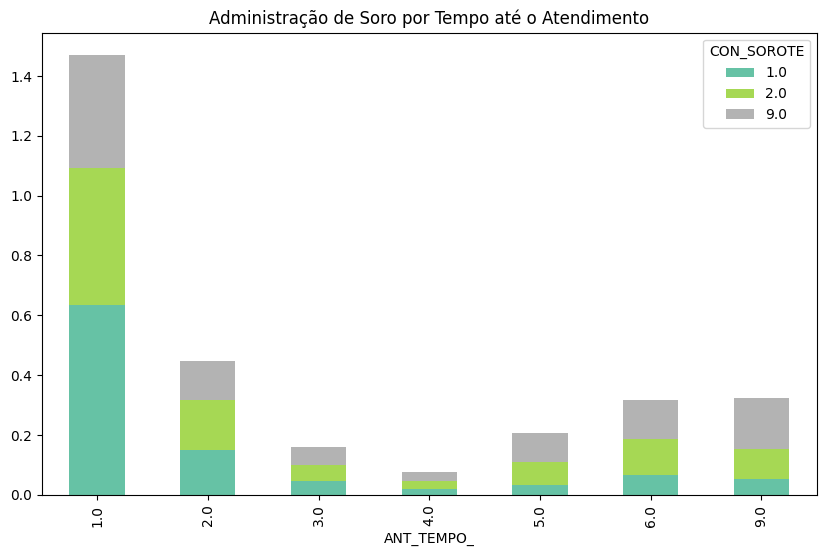

In [37]:
soro_tempo_N2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

In [38]:
soro_rel_casos = (soro_tempo/len(df)) * 100
soro_rel_casos

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,0.341283,41.557415,2.736505
1 - 3h,0.081159,14.847879,0.967661
3 - 6h,0.024972,4.823740,0.432846
6 - 12h,0.010405,2.434761,0.208099
12 - 24h,0.016648,6.956757,0.703375
24h ou mais,0.035377,10.806593,0.953094
Ignorado,0.029134,8.796354,1.250676


In [39]:
# Transformar o DataFrame para formato longo (long-form)
soro_rel_long = soro_rel_casos.reset_index().melt(
    id_vars='ANT_TEMPO_',
    var_name='Soro',
    value_name='Percentual'
)

# Criar gráfico de barras horizontais empilhadas
fig = px.bar(
    soro_rel_long,
    y='ANT_TEMPO_',
    x='Percentual',
    color='Soro',
    orientation='h',
    text=soro_rel_long['Percentual'].round(2).astype(str) + '%',
    title='Distribuição Percentual dos Casos por Tempo até Atendimento e Administração de Soro',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Ajustes visuais
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Percentual (%)',
    yaxis_title='Tempo entre Picada e Atendimento',
    barmode='stack',
    legend_title='Recebeu Soro'
)

fig.show()


## Perfil dos pacientes


### Idade dos pacientes

In [40]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4048, 4018, 4023, 4010, 4042, 4051, 4022, 4016, 4009, 4036, 4017,
       4032, 4057, 4053, 4061, 4062, 4025, 4031, 4020, 4052, 4049, 4005,
       4024, 4028, 4013, 4021, 4002, 4006, 4001, 4045, 4064, 4033, 4012,
       4003, 4059, 4004, 4029, 4007, 4065, 4019, 4034, 4030, 4008, 4044,
       4047, 4027, 4026, 4035, 4037, 4014, 4015, 4046, 4054, 4063, 4068,
       3003, 4040, 4038, 3005, 4011, 4039, 4050, 4058, 4087, 4041, 4072,
       4071, 4073, 3010, 4060, 4070, 4077, 4069, 4055, 2000, 2008, 4043,
       2001, 3002, 4076, 4074, 4079, 4056, 4075, 4066, 4067, 4085, 4082,
       4078, 4090, 3004, 2028, 3009, 4083, 3011, 3007, 3008, 2003, 3001,
       4084, 3006, 4081, 4094, 4080, 4092, 4093, 4089, 4088, 2011, 2013,
       2014, 2012, 2004, 2023, 1007, 4000, 2022, 4099, 3049, 2002, 4096,
       2007, 4086, 2029, 2015, 2005, 2027, 2010, 2018, 4095, 2006, 4091,
       2009, 2017, 2020, 4121, 2026, 4107, 4114, 2019, 4097, 2021])

In [41]:
# Converter para string e manter apenas os que têm 4 dígitos
df = df[df['NU_IDADE_N'].astype(str).str.match(r'^\d{4}$')]

In [42]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4048, 4018, 4023, 4010, 4042, 4051, 4022, 4016, 4009, 4036, 4017,
       4032, 4057, 4053, 4061, 4062, 4025, 4031, 4020, 4052, 4049, 4005,
       4024, 4028, 4013, 4021, 4002, 4006, 4001, 4045, 4064, 4033, 4012,
       4003, 4059, 4004, 4029, 4007, 4065, 4019, 4034, 4030, 4008, 4044,
       4047, 4027, 4026, 4035, 4037, 4014, 4015, 4046, 4054, 4063, 4068,
       3003, 4040, 4038, 3005, 4011, 4039, 4050, 4058, 4087, 4041, 4072,
       4071, 4073, 3010, 4060, 4070, 4077, 4069, 4055, 2000, 2008, 4043,
       2001, 3002, 4076, 4074, 4079, 4056, 4075, 4066, 4067, 4085, 4082,
       4078, 4090, 3004, 2028, 3009, 4083, 3011, 3007, 3008, 2003, 3001,
       4084, 3006, 4081, 4094, 4080, 4092, 4093, 4089, 4088, 2011, 2013,
       2014, 2012, 2004, 2023, 1007, 4000, 2022, 4099, 3049, 2002, 4096,
       2007, 4086, 2029, 2015, 2005, 2027, 2010, 2018, 4095, 2006, 4091,
       2009, 2017, 2020, 4121, 2026, 4107, 4114, 2019, 4097, 2021])

In [43]:
def classificar_faixa(valor):
    try:
        valor = int(valor)
        unidade = int(str(valor)[0])
        numero = int(str(valor)[1:])

        # Converter tudo para idade em anos
        if unidade == 1:
            idade = numero / (24 * 365)
        elif unidade == 2:
            idade = numero / 365
        elif unidade == 3:
            idade = numero / 12
        elif unidade == 4:
            idade = numero
        else:
            return "Ignorado"

        # Classificação em faixas de 10 em 10 anos
        if idade < 10:
            return "0-9 anos"
        elif idade < 20:
            return "10-19 anos"
        elif idade < 30:
            return "20-29 anos"
        elif idade < 40:
            return "30-39 anos"
        elif idade < 50:
            return "40-49 anos"
        elif idade < 60:
            return "50-59 anos"
        elif idade < 70:
            return "60-69 anos"
        elif idade < 80:
            return "70-79 anos"
        elif idade < 90:
            return "80-89 anos"
        elif idade < 100:
            return "90-99 anos"
        else:
            return "100 anos ou mais"
    except:
        return "Ignorado"

In [44]:
df['faixa_etaria'] = df['NU_IDADE_N'].apply(classificar_faixa)

In [45]:
casos_idade = pd.crosstab(index=df['faixa_etaria'], columns='Frequência').reset_index()
casos_idade

col_0,faixa_etaria,Frequência
0,0-9 anos,7944
1,10-19 anos,7527
2,100 anos ou mais,3
3,20-29 anos,11515
4,30-39 anos,8013
5,40-49 anos,5565
6,50-59 anos,3930
7,60-69 anos,2248
8,70-79 anos,969
9,80-89 anos,308


In [46]:
# Gráfico de pizza
fig = px.pie(
    casos_idade,
    names='faixa_etaria',
    values='Frequência',
    title="Distribuição de Casos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [47]:
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])
tabela_evolucao

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,7427,0,0,188
10-19 anos,7068,4,1,169
100 anos ou mais,3,0,0,0
20-29 anos,10820,2,0,293
30-39 anos,7553,9,0,191
40-49 anos,5221,14,0,131
50-59 anos,3704,16,2,84
60-69 anos,2080,21,1,65
70-79 anos,901,13,0,23


In [48]:
tab_evol = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'], normalize='index')
tab_evol

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,0.975312,0.000000,0.000000,0.024688
10-19 anos,0.975973,0.000552,0.000138,0.023336
100 anos ou mais,1.000000,0.000000,0.000000,0.000000
20-29 anos,0.973459,0.000180,0.000000,0.026361
30-39 anos,0.974204,0.001161,0.000000,0.024636
40-49 anos,0.972978,0.002609,0.000000,0.024413
50-59 anos,0.973200,0.004204,0.000525,0.022070
60-69 anos,0.959852,0.009691,0.000461,0.029995
70-79 anos,0.961580,0.013874,0.000000,0.024546


In [49]:
# Mapeamento para legenda
evolucao_dict = {
    1: 'Cura',
    2: 'Óbito por acidente',
    3: 'Óbito por outras causas',
    9: 'Ignorado'
}

# Converter EVOLUCAO para numérico (forçando erro para NaN), preencher com 9 e converter para int
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').fillna(9).astype(int)

# Criar tabela cruzada
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])

# Renomear colunas com base no dicionário
tabela_evolucao = tabela_evolucao.rename(columns=evolucao_dict)

# Converter para formato longo
tabela_long = tabela_evolucao.reset_index().melt(
    id_vars='faixa_etaria',
    var_name='Evolução',
    value_name='Frequência'
)

# Ordem desejada para faixa etária
ordem_idade = [
    '0-9 anos', '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos',
    '50-59 anos', '60-69 anos', '70-79 anos', '80-89 anos', '90-99 anos',
    '100 anos ou mais'
]

# Garantir que faixa_etaria está como categoria ordenada
tabela_long['faixa_etaria'] = pd.Categorical(
    tabela_long['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico com ordem forçada no eixo x
fig = px.bar(
    tabela_long,
    x='faixa_etaria',
    y='Frequência',
    color='Evolução',
    title='Distribuição dos Desfechos por Faixa Etária',
    labels={'faixa_etaria': 'Faixa Etária'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'faixa_etaria': ordem_idade}  # <- ordem explícita!
)
fig.update_layout(barmode='group')
fig.show()
fig.show()


In [50]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')

# Filtrar apenas os óbitos (EVOLUCAO == 2)
df_obitos = df[df['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_idade = pd.crosstab(index=df_obitos['faixa_etaria'],
                            columns='Óbitos',
                            dropna=False)

tab_obt_idade.reset_index()

col_0,faixa_etaria,Óbitos
0,10-19 anos,4
1,20-29 anos,2
2,30-39 anos,9
3,40-49 anos,14
4,50-59 anos,16
5,60-69 anos,21
6,70-79 anos,13
7,80-89 anos,11
8,90-99 anos,1


In [51]:
# Garantir que 'faixa_etaria' é uma coluna
if 'faixa_etaria' not in tab_obt_idade.columns:
    tab_obt_idade = tab_obt_idade.reset_index()

# Gráfico de pizza
fig = px.pie(
    tab_obt_idade,
    names='faixa_etaria',
    values='Óbitos',
    title="Distribuição Percentual de Óbitos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe,
)


fig.show()

In [52]:
# Garantir que os índices estejam alinhados
tab_obt_idade = tab_obt_idade.copy()
casos_idade = casos_idade.copy()

tab_obt_idade = tab_obt_idade.set_index('faixa_etaria')
casos_idade = casos_idade.set_index('faixa_etaria')

# Calcular o percentual de óbitos por faixa etária
tab_obt_idade['Percentual'] = (
    tab_obt_idade['Óbitos'] * 100 / casos_idade['Frequência']
)

# Formatar o percentual com 3 casas decimais e adicionar símbolo %
tab_obt_idade['Label'] = tab_obt_idade['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar o índice para facilitar visualização e uso no gráfico
tab_obt_idade = tab_obt_idade.reset_index()

# Visualizar tabela final
tab_obt_idade

col_0,faixa_etaria,Óbitos,Percentual,Label
0,10-19 anos,4,0.053142,0.053%
1,20-29 anos,2,0.017369,0.017%
2,30-39 anos,9,0.112317,0.112%
3,40-49 anos,14,0.251572,0.252%
4,50-59 anos,16,0.407125,0.407%
5,60-69 anos,21,0.934164,0.934%
6,70-79 anos,13,1.341589,1.342%
7,80-89 anos,11,3.571429,3.571%
8,90-99 anos,1,3.125000,3.125%


In [53]:
tab_obt_idade['faixa_etaria'] = pd.Categorical(
    tab_obt_idade['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico de barras
fig = px.bar(
    tab_obt_idade.sort_values('faixa_etaria'),
    x='faixa_etaria',
    y='Percentual',
    text='Label',
    title='Letalidade por Faixa Etária (%)',
    labels={'faixa_etaria': 'Faixa Etária', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe, # vermelho escuro, cor de alerta
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Letalidade (%)', xaxis_title='Faixa Etária')

fig.show()


In [54]:
# Criar uma cópia do DataFrame original para não modificar df diretamente
casos_grupo = df.copy()

# Extrair a idade mínima da faixa etária (ex: '10 a 14' → 10)
casos_grupo['idade_min'] = casos_grupo['faixa_etaria'].str.extract(r'(\d+)').astype(float)

# Classificar em grupos etários personalizados
casos_grupo['grupo_etario'] = np.select(
    condlist=[
        casos_grupo['idade_min'] <= 19,
        casos_grupo['idade_min'] >= 60
    ],
    choicelist=[
        'Crianças e Adolescentes',
        'Idosos'
    ],
    default='Adultos'
)

obitos_grupo = casos_grupo.copy()
casos_grupo = pd.crosstab(index=casos_grupo['grupo_etario'], columns='Frequência').reset_index()
casos_grupo

col_0,grupo_etario,Frequência
0,Adultos,29023
1,Crianças e Adolescentes,15471
2,Idosos,3560


In [55]:
# Gráfico de pizza
fig = px.pie(
    casos_grupo,
    names='grupo_etario',
    values='Frequência',
    title="Frequência de acidentes por grupo etário",
    color_discrete_sequence=px.colors.qualitative.Safe,
)
fig.show()

In [56]:
# Filtrar apenas os óbitos (EVOLUCAO == 2)
obitos_grupo = obitos_grupo[obitos_grupo['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_grupo = pd.crosstab(index=obitos_grupo['grupo_etario'],
                            columns='Óbitos',
                            dropna=False).reset_index()

tab_obt_grupo

col_0,grupo_etario,Óbitos
0,Adultos,41
1,Crianças e Adolescentes,4
2,Idosos,46


In [57]:
# Garantir cópia dos DataFrames e alinhamento de índice
tab_obt_grupo = tab_obt_grupo.copy()
casos_grupo = casos_grupo.copy()

# Garantir que ambos estejam indexados por 'grupo_etario'
tab_obt_grupo = tab_obt_grupo.set_index('grupo_etario')
casos_grupo = casos_grupo.set_index('grupo_etario')

# Calcular o percentual de óbitos por grupo etário
tab_obt_grupo['Percentual'] = (
    tab_obt_grupo['Óbitos'] * 100 / casos_grupo['Frequência']
)

# Formatar percentual com 3 casas decimais e símbolo %
tab_obt_grupo['Label'] = tab_obt_grupo['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar índice para facilitar visualização e uso em gráficos
tab_obt_grupo = tab_obt_grupo.reset_index()

# Exibir a tabela final
tab_obt_grupo

col_0,grupo_etario,Óbitos,Percentual,Label
0,Adultos,41,0.141267,0.141%
1,Crianças e Adolescentes,4,0.025855,0.026%
2,Idosos,46,1.292135,1.292%


In [58]:
# Reforçar o tipo de dado como string (se perdeu no processo anterior)
tab_obt_grupo['grupo_etario'] = tab_obt_grupo['grupo_etario'].astype(str)

# Definir a ordem correta das categorias
ordem_grupo = ['Crianças e Adolescentes', 'Adultos', 'Idosos']
tab_obt_grupo['grupo_etario'] = pd.Categorical(
    tab_obt_grupo['grupo_etario'],
    categories=ordem_grupo,
    ordered=True
)

# Gráfico de barras com Plotly
fig = px.bar(
    tab_obt_grupo.sort_values('grupo_etario'),
    x='grupo_etario',
    y='Percentual',
    text='Label',
    title='Letalidade por Grupo Etário (%)',
    labels={'grupo_etario': 'Grupo Etário', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Letalidade (%)', xaxis_title='Grupo Etário')

fig.show()


### Raça/Cor

In [59]:
tab_raca = pd.crosstab(index=df['CS_RACA'], columns='Frequência').reset_index()
tab_raca

col_0,CS_RACA,Frequência
0,1.0,31367
1,2.0,2104
2,3.0,229
3,4.0,7992
4,5.0,75
5,9.0,5485


In [60]:
# Dicionário de mapeamento dos códigos
raca_dict = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

# Aplicar o mapeamento à coluna
tab_raca['Raça/Cor'] = tab_raca['CS_RACA'].map(raca_dict)


In [61]:
fig = px.pie(
    tab_raca,
    names='Raça/Cor',
    values='Frequência',
    title='Distribuição de Casos por Raça/Cor',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()

In [62]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
df_obt_raca = pd.crosstab(index=df_obt['CS_RACA'], columns='Frequência').reset_index()
df_obt_raca

col_0,CS_RACA,Frequência
0,1.0,64
1,2.0,6
2,3.0,4
3,4.0,10
4,9.0,7


In [63]:
df_obt_raca['Percentual'] = df_obt_raca['Frequência'] * 100 / tab_raca['Frequência']
df_obt_raca['Label'] = df_obt_raca['Percentual'].apply(lambda x: f'{x:.3f}%')
df_obt_raca['Raca'] = df_obt_raca['CS_RACA'].map(raca_dict)
df_obt_raca

col_0,CS_RACA,Frequência,Percentual,Label,Raca
0,1.0,64,0.204036,0.204%,Branca
1,2.0,6,0.285171,0.285%,Preta
2,3.0,4,1.746725,1.747%,Amarela
3,4.0,10,0.125125,0.125%,Parda
4,9.0,7,9.333333,9.333%,Ignorado


In [64]:
# Criar gráfico de barras
fig = px.bar(
    df_obt_raca,
    x='Raca',
    y='Percentual',
    title='Letalidade por Raça/Cor (%)',
    labels={'Percentual': 'Letalidade (%)', 'Raca': 'Raça/Cor'},
    color_discrete_sequence=px.colors.qualitative.Safe
)


fig.show()

### Gênero

In [65]:
genero_abs = pd.crosstab(index=df['CS_SEXO'], columns='Frequência').reset_index()
genero_abs

col_0,CS_SEXO,Frequência
0,F,16841
1,I,22
2,M,31191


In [66]:
# Gráfico de pizza
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Frequência',
    title="Distribuição de Casos por Gênero",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [67]:
# População estimada do estado de SP por sexo (fonte: https://censo2022.ibge.gov.br/panorama/)
populacao_sp = {
    'M': 23014862,
    'F': 21396376
}

# Calcular taxa por 100 mil habitantes
genero_abs['Populacao_SP'] = genero_abs['CS_SEXO'].map(populacao_sp)
genero_abs['Taxa_por_100k'] = (genero_abs['Frequência'] / genero_abs['Populacao_SP']) * 100000

# Gráfico de pizza com taxas
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Taxa_por_100k',
    title="Taxa de Acidentes com Animais Peçonhentos por Gênero em SP (por 100 mil habitantes)",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [68]:
genero_abs

col_0,CS_SEXO,Frequência,Populacao_SP,Taxa_por_100k
0,F,16841,21396376.0,78.709591
1,I,22,NaN,NaN
2,M,31191,23014862.0,135.525470


### Grávidas

In [69]:
pd.crosstab(index=df['CS_GESTANT'], columns='Frequência').reset_index()

col_0,CS_GESTANT,Frequência
0,1.0,64
1,2.0,89
2,3.0,35
3,4.0,13
4,5.0,9461
5,6.0,35883
6,9.0,2507


In [70]:
df['Gesta_status'] = df['CS_GESTANT'].apply(
    lambda x: 'Não' if x in [5, 6, 9] else 'Sim'
)

In [71]:
tabela_ges = pd.crosstab(index=df['Gesta_status'], columns='Frequência').reset_index()
tabela_ges


col_0,Gesta_status,Frequência
0,Não,47851
1,Sim,203


In [72]:
df_gest = df.copy()
df_gest = df_gest[df_gest['Gesta_status'] == 'Sim']
pd.crosstab(index=df_gest['EVOLUCAO'], columns='Frequência').reset_index()

col_0,EVOLUCAO,Frequência
0,1,187
1,9,16


Não há registro de morte por animais peçonhentos em gestantes

### Escolaridade

In [73]:
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()
escol

col_0,CS_ESCOL_N,Frequência
0,0.0,211
1,1.0,3129
2,2.0,1654
3,3.0,4383
4,4.0,2566
5,5.0,3395
6,6.0,8845
7,7.0,755
8,8.0,1518
9,9.0,12717


In [74]:
# Agrupar 0.0, 9.0 e 10.0 como 9.0 (Ignorado)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace({0.0: 9.0, 10.0: 9.0})

# Gerar nova crosstab
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()

# Mapear os códigos para rótulos legíveis
escolaridade_dict = {
    1.0: '1ª a 4ª série incompleta',
    2.0: '4ª série completa',
    3.0: '5ª a 8ª série incompleta',
    4.0: 'Ensino fund. completo',
    5.0: 'Ensino médio incompleto',
    6.0: 'Ensino médio completo',
    7.0: 'Superior incompleto',
    8.0: 'Superior completo',
    9.0: 'Ignorado'
}

escol['Escolaridade'] = escol['CS_ESCOL_N'].map(escolaridade_dict)

escol

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,3129,1ª a 4ª série incompleta
1,2.0,1654,4ª série completa
2,3.0,4383,5ª a 8ª série incompleta
3,4.0,2566,Ensino fund. completo
4,5.0,3395,Ensino médio incompleto
5,6.0,8845,Ensino médio completo
6,7.0,755,Superior incompleto
7,8.0,1518,Superior completo
8,9.0,18303,Ignorado


In [75]:
ordem_escolaridade = [
    '1ª a 4ª série incompleta',
    '4ª série completa',
    '5ª a 8ª série incompleta',
    'Ensino fund. completo',
    'Ensino médio incompleto',
    'Ensino médio completo',
    'Superior incompleto',
    'Superior completo',
    'Ignorado'
]


fig = px.pie(
    escol,
    names='Escolaridade',
    values='Frequência',
    title='Distribuição de Casos por Escolaridade',
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'Escolaridade': ordem_escolaridade}
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()



In [76]:
df_escol = df.copy()
df_escol = df_escol[df_escol['EVOLUCAO'] == 2]
escol_obt = pd.crosstab(index=df_escol['CS_ESCOL_N'], columns='Frequência').reset_index()
escol_obt['Escolaridade'] = escol_obt['CS_ESCOL_N'].map(escolaridade_dict)
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,11,1ª a 4ª série incompleta
1,2.0,7,4ª série completa
2,3.0,11,5ª a 8ª série incompleta
3,4.0,5,Ensino fund. completo
4,5.0,5,Ensino médio incompleto
5,6.0,9,Ensino médio completo
6,7.0,1,Superior incompleto
7,8.0,4,Superior completo
8,9.0,32,Ignorado


In [77]:
escol_obt['Percentual'] = escol_obt['Frequência'] * 100 / escol['Frequência']
escol_obt['Label'] = escol_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade,Percentual,Label
0,1.0,11,1ª a 4ª série incompleta,0.351550,0.352%
1,2.0,7,4ª série completa,0.423216,0.423%
2,3.0,11,5ª a 8ª série incompleta,0.250970,0.251%
3,4.0,5,Ensino fund. completo,0.194856,0.195%
4,5.0,5,Ensino médio incompleto,0.147275,0.147%
5,6.0,9,Ensino médio completo,0.101752,0.102%
6,7.0,1,Superior incompleto,0.132450,0.132%
7,8.0,4,Superior completo,0.263505,0.264%
8,9.0,32,Ignorado,0.174835,0.175%


In [78]:
fig = px.bar(
    escol_obt,
    x='Escolaridade',
    y='Percentual',
    title='Letalidade por Escolaridade (%)',
    labels={'Percentual': 'Percentual de letalidade', 'Escolaridade': 'Nível de Escolaridade'},
    color_discrete_sequence=px.colors.qualitative.Safe
)


fig.show()


### Acidente de trabalho

In [79]:
# Dicionário de legenda para "Relacionado ao Trabalho"
trab_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

# Converter a coluna para tipo numérico (necessário para evitar erros de mapeamento)
df['DOENCA_TRA'] = pd.to_numeric(df['DOENCA_TRA'], errors='coerce')

# Substituir os valores na coluna pelo texto correspondente usando o dicionário
df['DOENCA_TRA'] = df['DOENCA_TRA'].map(trab_legend)

# Garantir que os valores existentes estejam mapeados corretamente
print("Valores únicos após mapeamento:")
print(df['DOENCA_TRA'].value_counts())

# Agrupando os dados por "Relacionado ao Trabalho" e contando os casos
filtered_data = df.groupby(["DOENCA_TRA"]).size().reset_index(name="Casos")

# Criando o gráfico de barras para visualizar os casos relacionados ao trabalho
fig = px.bar(
    filtered_data,
    x="DOENCA_TRA",
    y="Casos",
    title="Casos relacionados ao trabalho",
    labels={"Casos": "Número de Casos", "DOENCA_TRA": "Relacionado ao Trabalho"},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()


Valores únicos após mapeamento:
DOENCA_TRA
Não         36345
Sim          6301
Ignorado     3724
Name: count, dtype: int64
